<a href="https://www.kaggle.com/code/emilymsung/bellabeat-data-analysis-case-study-with-python?scriptVersionId=105773346" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Table of Contents

[Introduction](#intro)   
   
[Summary](#summary)   
   
[1. Ask](#ask)   
[2. Prepare](#prepare)   
[3. Process](#process)   
[4. Analyze](#analyze)    
[5. Share & Act](#share_act)   
   
[Appendix](#appendix)
***

## <a id="intro">Introduction</a>

_* This case study was completed as a part of the [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics?)._ 

[Bellabeat](https://bellabeat.com/) is a small health-tech company that has the potential to become a larger player in the global smart device market. We are going to focus on one of the smart device products in the market and analyze the data to gain insights that might help guide the marketing strategy for the company.



[![bellabeat-website-hero.png](https://i.postimg.cc/Dw1zLjtM/bellabeat-website-hero.png)](https://postimg.cc/9DFVjpXd)

***

## <a id="summary">Summary</a>

### General Insights
#### Activity
* users took on avg. 8,531 steps a day
* users were physically active for 15.4% of the day, most of which was classified as ‘light activity’

#### Sleep
* users spent on avg. 459 mins (7.5 hrs) a day in bed
* on avg. 419 mins (7 hrs) a day was spent sleeping

#### Usage
* **device usage decreased gradually**: 52% of users stopped wearing their devices by the end of the month
* only 12 users made consistent use of the sleep tracking function of their devices (3 weeks+)
* **users who tracked their sleep often had higher physical activity levels**


### A Closer Look
* users were the most active during the first 2 weeks
* users walked the most on Tuesdays and Saturdays, the least on Sundays
* there are 2 main groups of users: more (consistent higher activity) and less active groups
* 6 users who walked a on some occasions, e.g., more than 20,000 steps on some days, were in the more active group

### Data to Help Bellabeat’s Marketing Strategy
Smart Device Usage Trends
* Half of users stopped wearing devices by the end of the month
* Users who kept tracking and were more active, stayed more active

Bellabeat’s Marketing Strategy
* focus on **wearability and unobtrusiveness of Bellabeat products**
* focus on **continued health benefits of awareness**
* encourage people to start and sustain healthy habits

### Next Steps
Further analysis with a larger dataset containing more detailed data is needed
* user-related data such as descriptives and demographics (gender, occupation, age, bmi) 
* menstrual cycle data
* battery life data


***

## <a id="ask">1. Ask</a>

We would like to gain insight into how consumers use non-Bellabeat smart devices. Here are some of the questions we have:

**1. What are some trends in smart device usage?**  

**2. How could these trends apply to Bellabeat customers?**  

**3. How could these trends help influence Bellabeat's marketing strategy?**

We will be presenting our analysis to the executive team along with high-level recommendations for the company's marketing strategy.  

***

## <a id="prepare">2. Prepare</a>


### About Dataset

* Data source: [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit).
* License: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)

* Credibility: Medium-high 
    * **Reliable & Original: Yes** - The data was collected from 33 eligible fitbit users with their consent via Amazon Mechanical Turk by the company. Data from several users is missing or incomplete. 
    * **Comprehensive: Yes** - The dataset includes minute-level output for physical activity, heart rate, and sleep monitoring for 1 month. It has multiple variables (calories, timestamps, steps, intensities, and sleep related data) that can be analyzed. However, there are lots of missing data. 
    * **Current: No** - The data was collected 6 years ago, and the dataset was last updated 2 years ago.
    * **Cited: No** - The data is not cited but has been used for many data analysis projects mostly in Kaggle.  


|Dataset Name||Data Collection Period||Last Updated||Date Downloaded||File Type||File Count|
|:-:||:-:||:-:||:-:||:-:||:-:|
|FitBit Fitness Tracker Data||2016/04/12 - 2016/05/12||2020||2022/06/18||.csv||18|


### Selected Files

We decided to focus on activity and sleep in this analysis.

We are going to work mainly with **'dailyActivity_merged'(File 1), 'hourlySteps_merged' (File 11), and 'sleepDay_merged'(File 14)** for this analysis. File 1 has most of the data we're interested in at the day & week levels, File 11 has the hour level steps that we need to compare user groups, and we also would like to analyze sleep related data. Although we are interested in the 'weightLogInfo_merged'(File 18), we decided to not use it this time as it only contains data from 8 users. The details of each file in this dataset can be found <a id="files">here</a>. 



### Data Integrity

There are no duplicate values in these files. Below are the a few things we've found about data integrity upon examining the data (visual inspection in Microsoft Excel). 

* Not all users have records for all variables. 

|File Name||# of rows||# of individuals|
|:-:||:-:||:-:|
|dailyActivity_merged||940||33|
|hourlySteps_merged||22099||33|
|sleepDay_merged||413||24|

* Some columns need more explanation.

|File Name||Issue In (column)||Issue|
|:-||:-||:-|
|dailyActivity_merged||TotalDistance, TrackerDistance||The unit of distance is not specified.|
|sleepDay_merged||TotalTimeInBed|| It is unclear how this was measured. Can the difference between 'TotalTimeInBed' and 'TotalMinuteAsleep' be interpreted as time trying to fall asleep? Or does it include all the time staying in bed before falling asleep and after waking up no matter what the users were doing? Answering these questions will need more information.| 

***

## <a id="process">3. Process</a>

We used Microsoft Excel for visually inspecting the data in the previous step as the size of the dataset is not too large. In this step, we are going to use Python to clean, analyze, and visualize data.

### 1. Import the packages & files

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# import files as pandas dataframes
activity_d = pd.DataFrame(pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')) 
sleep_d = pd.DataFrame(pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv'))
steps_h = pd.DataFrame(pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv'))

### 2. Check the data structure

In [3]:
# check the data structure (output with a new line in between for readability)
activity_d.info()
print('\n')
sleep_d.info()
print('\n')
steps_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

### 3. Organize the data

We're going to change data type and name of some columns, and confirm the changes.

In [4]:
# change the data type of 'Id' from 'int64' to 'object' as we don't want to aggregate the Ids
activity_d['Id'] = activity_d['Id'].astype('object')
sleep_d['Id'] = sleep_d['Id'].astype('object')
steps_h['Id'] = steps_h['Id'].astype('object')

In [5]:
# change the data types of both columns, 'ActivityDate' and 'SleepDay' from 'object' to 'datetime64'
activity_d['ActivityDate'] = activity_d['ActivityDate'].astype('datetime64')
sleep_d['SleepDay'] = sleep_d['SleepDay'].astype('datetime64')

In [6]:
# rename the columns to 'Date' so we can join these files on the same column
activity_d = activity_d.rename({'ActivityDate':'Date'}, axis=1)
sleep_d = sleep_d.rename({'SleepDay':'Date'}, axis=1)

In [7]:
# confirm the changes
activity_d.dtypes

Id                                  object
Date                        datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [8]:
# confirm the changes
sleep_d.dtypes

Id                            object
Date                  datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

In [9]:
# confirm the changes
steps_h.dtypes

Id              object
ActivityHour    object
StepTotal        int64
dtype: object

### 4. Validate the data

We're going to get summary statistics of the dataset and plot some of them to validate and understand our data.

In [10]:
# get summary statistics of the dataframe, 'activity_d'
round(activity_d.describe(), 1)

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.0,940.0,940.0,940.0,940.0,940.0,940.0,940.0,940.0,940.0,940.0,940.0,940.0
mean,7637.9,5.5,5.5,0.1,1.5,0.6,3.3,0.0,21.2,13.6,192.8,991.2,2303.6
std,5087.2,3.9,3.9,0.6,2.7,0.9,2.0,0.0,32.8,20.0,109.2,301.3,718.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3789.8,2.6,2.6,0.0,0.0,0.0,1.9,0.0,0.0,0.0,127.0,729.8,1828.5
50%,7405.5,5.2,5.2,0.0,0.2,0.2,3.4,0.0,4.0,6.0,199.0,1057.5,2134.0
75%,10727.0,7.7,7.7,0.0,2.1,0.8,4.8,0.0,32.0,19.0,264.0,1229.5,2793.2
max,36019.0,28.0,28.0,4.9,21.9,6.5,10.7,0.1,210.0,143.0,518.0,1440.0,4900.0


There are a few values that don't seem to be valid. For example, the 'TotalSteps' wouldn't be 0 if the device was worn and the data were tracked properly. (For the purposes of this project, we will use an arbitrary threshold of 10 steps as the minimum - more information about the devices and how they are set up would be needed to create a proper threshold)

In [11]:
# check the data where 'TotalSteps' is equal or greater than 0 and less than 10
activity_d[(activity_d.TotalSteps >= 0) & (activity_d.TotalSteps < 10) ]

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,2016-05-12,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,0
100,1844505072,2016-04-20,8,0.01,0.01,0.0,0.0,0.0,0.01,0.0,0,0,1,1439,1349
104,1844505072,2016-04-24,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1347
105,1844505072,2016-04-25,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1347
106,1844505072,2016-04-26,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,2016-05-06,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1688
905,8792009665,2016-05-07,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1688
906,8792009665,2016-05-08,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1688
907,8792009665,2016-05-09,0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,1440,1688


Considering the values in other columns in these 80 rows are also 0 or similar (other than the columns, 'sedentaryMinutes' and 'Calories', which have default values when the device is not worn), we will treat these as invalid values and drop them.   

In [12]:
# drop the the 80 rows which has less than 10 TotalSteps
activity_d = activity_d.drop(activity_d[activity_d.TotalSteps < 10].index)

We will also drop the rows where 'SedentaryMinutes' is closer to 0 or the default value (1440 minutes/24 hours). 

In [13]:
# drop the rows which have fewer than 10 or greater than 1430 SedentaryMinutes
activity_d = activity_d.drop(activity_d[(activity_d.SedentaryMinutes < 20) | (activity_d.SedentaryMinutes > 1400)].index)

Below is how the column 'TotalSteps' in 'activity_d' is distributed after making changes.

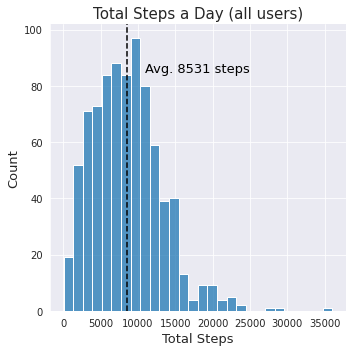

In [14]:
# set style
sns.set_style("darkgrid")

# plot a histogram of TotalSteps
sns.displot(activity_d.TotalSteps, kind = 'hist')

# add the vertical line and text for the mean value 
plt.axvline(round(activity_d.TotalSteps.mean()), ls = '--', c = 'black')
plt.text(11000, 85, 'Avg. ' + str(round(activity_d.TotalSteps.mean())) + ' steps', c = 'black', size = 13)

# set labels, title, and layout
plt.title('Total Steps a Day (all users)', size = 15)
plt.xlabel('Total Steps', size = 13)
plt.ylabel('Count', size = 13)
plt.tight_layout()

# export the figure (for the report)
# plt.savefig('...', bbox_inches = 'tight')

# show the histogram
plt.show()

Users took on **avg. 8,531 steps a day**. Let's move on to the sleep data.

In [15]:
# get summary statistics of 'sleep_d'
round(sleep_d.describe())

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.0,413.0,413.0
mean,1.0,419.0,459.0
std,0.0,118.0,127.0
min,1.0,58.0,61.0
25%,1.0,361.0,403.0
50%,1.0,433.0,463.0
75%,1.0,490.0,526.0
max,3.0,796.0,961.0


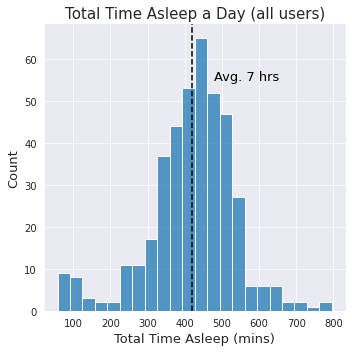

In [16]:
# plot a histogram of TotalMinutesAsleep
sns.displot(sleep_d.TotalMinutesAsleep, kind = 'hist')

# add the vertical line and text for the mean value 
plt.axvline(round(sleep_d.TotalMinutesAsleep.mean()), ls = '--', c = 'black')
plt.text(480, 55, 'Avg. ' + str(round(sleep_d.TotalMinutesAsleep.mean()/60)) + ' hrs', c = 'black', size = 13)

# set labels, title, and layout
plt.title('Total Time Asleep a Day (all users)', size = 15)
plt.xlabel('Total Time Asleep (mins)', size = 13)
plt.ylabel('Count', size = 13)
plt.tight_layout()

# export the figure (for the report)
# plt.savefig('...', bbox_inches = 'tight')

# show the histogram
plt.show()

* the users spent on avg. 459 mins (7.5 hrs) a day in bed
* **on avg. 419 mins (7 hrs) a day was spent sleeping**

The sleep data doesn't seem to have any invalid values.

***

## <a id="analyze">4. Analyze</a>

### 1. General Insights
#### 1.1 Usage Over Time

In [17]:
# subset 'activity_d' for a lineplot showing decrease in device usage over time
IdCount = pd.DataFrame(activity_d.groupby(by = 'Date').Id.count())

In [18]:
# add a column for percentage
IdCount['Percent'] = round(IdCount.Id / 33 * 100, 1)

In [19]:
# reset index to convert 'Date' to a column 
IdCount.reset_index()

,Date,Id,Percent
0,2016-04-12,29,87.9
1,2016-04-13,31,93.9
2,2016-04-14,30,90.9
3,2016-04-15,33,100.0
4,2016-04-16,28,84.8
5,2016-04-17,27,81.8
6,2016-04-18,29,87.9
7,2016-04-19,27,81.8
8,2016-04-20,29,87.9
9,2016-04-21,26,78.8


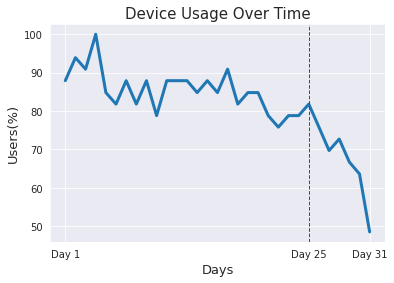

In [20]:
# generate the plot
ax = sns.lineplot(data=IdCount, x = 'Date', y = 'Percent', linewidth = 3)

# set the labels
ytick_labels = [50, 60, 70, 80, 90, 100]
ax.set_title('Device Usage Over Time', fontsize = 15)
ax.set_xlabel('Days', fontsize = 13)
ax.set_ylabel('Users(%)', fontsize = 13)
ax.set_xticks(['2016-04-12', '2016-05-06', '2016-05-12'])
ax.set_yticks(ytick_labels)
ax.set_yticklabels(ytick_labels)

# rename the xtick labels
days = ['Day 1', 'Day 25', 'Day 31']
ax.set_xticklabels(days)

# add a vertical line for the data point
ax.axvline(pd.to_datetime('2016-05-06'), color = 'red', linestyle = '--', linewidth = 1)

# export the figure
# plt.savefig('...', dpi = 400, bbox_inches = 'tight')

# show the plot
plt.show()

* device **usage decreased gradually**; 
* 45.5 % of users tracked daily activity for at least 30 days
* 12.1% of users tracked daily activity for less than 15 days
* 52% of users stopped wearing their devices by the end of the month

#### 1.2 Usage Trends: Sleep Tracking(1)
Before we begin, let's take a look at the overview of the month by plotting descriptive summary statistics. To do so, we will make a dataframe with the full date range and merge it with 'actividy_d' and 'sleep_d' so we have all the date range including the days when devices were not worn and all the data we're interested in is in one dataframe.

In [21]:
# create a new dataframe which has all values in the data collection period: from 2016-04-12 to 2016-05-12
dates = pd.date_range('2016-04-12', periods = 31, freq = 'D')
date_df = pd.DataFrame(dates)

In [22]:
# add a column name 'Date' and change the data type to merge 'date_df' with 'activity_d' 
date_df.columns = ['Date']
date_df['Date'] = date_df['Date'].astype('datetime64')

In [23]:
# concat 'date_df' and all unique Ids
Ids = activity_d.Id.unique()
full_id_dates = pd.concat((pd.DataFrame({'Date': dates}).assign(Id = i) for i in Ids), ignore_index = True)

In [24]:
# check the dataframe
full_id_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1023 non-null   datetime64[ns]
 1   Id      1023 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 16.1 KB


In [25]:
# merge 'full_id_dates' and 'activity_d'
activity_full = pd.merge_ordered(full_id_dates, activity_d, on = ['Date', 'Id'], how = 'outer')

In [26]:
# merge 'activity_full' and 'sleep_d'
full_merged = pd.merge_ordered(activity_full, sleep_d.drop_duplicates(), on = ['Date', 'Id'], how = 'outer')

In [27]:
# check the dataframe
full_merged.head()

,Date,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,2016-04-12,1503960366,13162.0,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25.0,13.0,328.0,728.0,1985.0,1.0,327.0,346.0
1,2016-04-12,1624580081,8163.0,5.31,5.31,0.0,0.00,0.00,5.31,0.0,0.0,0.0,146.0,1294.0,1432.0,NaN,NaN,NaN
2,2016-04-12,1644430081,10694.0,7.77,7.77,0.0,0.14,2.30,5.33,0.0,2.0,51.0,256.0,1131.0,3199.0,NaN,NaN,NaN
3,2016-04-12,1844505072,6697.0,4.43,4.43,0.0,0.00,0.00,4.43,0.0,0.0,0.0,339.0,1101.0,2030.0,NaN,NaN,NaN
4,2016-04-12,1927972279,678.0,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0.0,0.0,55.0,734.0,2220.0,3.0,750.0,775.0


How often did users wear their devices when going to bed? 

In [28]:
# create a dictionary of Ids and number of tracked days
sleep_dis = dict(full_merged.groupby('Id').TotalMinutesAsleep.count())

In [29]:
# convert the dictionary to a dataframe
sleep_dis_df = pd.DataFrame(list(sleep_dis.items()), columns = ['Id', 'TotalDaysTracked'])

In [30]:
# build a function outputs the name of the bins
def bin_names(df):
    if df['TotalDaysTracked'] > 25:
        return '26-33 days'
    elif df['TotalDaysTracked'] > 20:
        return '21-25 days'
    elif df['TotalDaysTracked'] > 15:
        return '16-20 days'
    elif df['TotalDaysTracked'] > 10:
        return '11-15 days'
    elif df['TotalDaysTracked'] > 5:
        return '6-10 days'
    elif df['TotalDaysTracked'] > 0:
        return '1-5 days'
    else:
        return '0 day'

In [31]:
# create a column 'Bins' in 'sleep_dis_df
sleep_dis_df['DaysTracked'] = sleep_dis_df.apply(bin_names, axis = 1)

In [32]:
# count the value of each bin
bin_count = sleep_dis_df.groupby('DaysTracked').TotalDaysTracked.count()

In [33]:
# convert the dictionary to a dataframe
bin_df = pd.DataFrame(list(bin_count.items()), columns = ['Days Tracked', '# of Users'])

In [34]:
# change the order of index
bin_df = bin_df.reindex([0, 1, 6, 2, 3, 4, 5])

In [35]:
# add a column for percentage
bin_df['Percentage'] = [round(x / len(Ids) * 100, 1) for x in bin_df['# of Users']]

In [36]:
# check the dataframe
bin_df

,Days Tracked,# of Users,Percentage
0,0 day,9,27.3
1,1-5 days,8,24.2
6,6-10 days,1,3.0
2,11-15 days,2,6.1
3,16-20 days,1,3.0
4,21-25 days,3,9.1
5,26-33 days,9,27.3


* 9 users did not track their sleep at all
* only 12 users made consistent use of the sleep tracking function of their devices (3 weeks+)
* _were these 12 users consistently more active?_
-> **On the whole, sleep tracking was not well adopted by most people**.

#### 1.3 Usage Trends: Sleep Tracking(2)
Let's take a look at these 12 users' activity/usage trends.

In [37]:
# create a list of user ids who tracked their sleep at least for 21 days
tracked_users_ids = sleep_dis_df[sleep_dis_df.TotalDaysTracked >= 21].Id.to_list()

In [38]:
# subset the data for the 12 users
tracked_users_df = full_merged[full_merged.Id.isin(tracked_users_ids)]

In [39]:
# create columns for # of days they tracked their activity, # of days they tracked their sleep, 
# avg.TotalSteps, and avg. sleep time of the 12 users 
tw_users_tracked_activity = tracked_users_df.groupby('Id').TotalSteps.count()
tw_users_tracked_sleep = tracked_users_df.groupby('Id').TotalMinutesAsleep.count()
tw_users_avg_steps = round(tracked_users_df.groupby('Id').TotalSteps.mean())
tw_users_avg_sleep = round(tracked_users_df.groupby('Id').TotalMinutesAsleep.mean())

In [40]:
# build the dataframe
tw_df = pd.concat({'Days Tracked Sleep': tw_users_tracked_sleep, 'Days Tracked Activity': tw_users_tracked_activity,  
                    'Avg. Steps a Day': tw_users_avg_steps, 'Avg. Sleep(min) a Day': tw_users_avg_sleep}, axis = 1)

In [41]:
# sort the data
tw_df = tw_df.sort_values('Avg. Steps a Day', ascending = False)

In [42]:
# check the dataframe
tw_df

,Days Tracked Sleep,Days Tracked Activity,Avg. Steps a Day,Avg. Sleep(min) a Day
Id,,,,
1503960366,25,30,12521.0,360.0
3977333714,28,29,11338.0,294.0
4388161847,23,30,10837.0,400.0
7086361926,24,29,10017.0,453.0
6962181067,31,31,9795.0,448.0
5577150313,26,28,8898.0,432.0
4702921684,27,30,8858.0,417.0
8378563200,31,31,8718.0,445.0
5553957443,31,31,8613.0,463.0


It seems that these users who consistently tracked their sleep also tracked their physical activity often. Let's compare the mean values of these with the ones of the rest of the users.

In [43]:
# reset index
tw_df = tw_df.reset_index()

In [44]:
# subset the data for the rest of the users and get the mean values of the columns above
nontrackers_df = full_merged[~full_merged.Id.isin(tw_df.Id)]

In [45]:
# get the average value of each column for the rest of the users
nontrackers_tr_activity = nontrackers_df.groupby('Id').TotalSteps.count().mean()
nontrackers_tr_sleep = nontrackers_df.groupby('Id').TotalMinutesAsleep.count().mean()
nontrackers_steps = nontrackers_df.TotalSteps.mean()
nontrackers_sleep = nontrackers_df.TotalMinutesAsleep.mean()

In [46]:
# create a pandas series for the values of nontrackers
nontrackers = pd.Series({'Days Tracked Sleep (avg.)':round(nontrackers_tr_sleep),
                         'Days Tracked Activity (avg.)':round(nontrackers_tr_activity),
                         'Steps a Day (avg.)':round(nontrackers_steps),
                         'Sleep (min) a Day (avg.)':round(nontrackers_sleep)})

In [47]:
# convert it to a dataframe
trackers_vs_nontrackers = nontrackers.to_frame()

In [48]:
# rename the column
trackers_vs_nontrackers = trackers_vs_nontrackers.rename(columns = {0:'Non-trackers (n = 21)'})

In [49]:
# add a new column with the mean values of the consistent sleep trackers
trackers_vs_nontrackers['Consistent Sleep Trackers (n = 12)'] = [round(tw_df['Days Tracked Sleep'].mean()),
                                                                 round(tw_df['Days Tracked Activity'].mean()),
                                                                 round(tw_df['Avg. Steps a Day'].mean()),
                                                                 round(tw_df['Avg. Sleep(min) a Day'].mean())]

In [50]:
# check the dataframe
trackers_vs_nontrackers

,Non-trackers (n = 21),Consistent Sleep Trackers (n = 12)
Days Tracked Sleep (avg.),4,27
Days Tracked Activity (avg.),23,30
Steps a Day (avg.),8228,8955
Sleep (min) a Day (avg.),398,423


* most users who consistently tracked their sleep also tracked their physical activity more often than others.
-> **users who tracked their sleep often, had higher physical activity levels .**

### 2. A Closer Look
#### 2.1 Activity Trends: Week Level
Let's take a look at the different levels of activity intensity. Here we will use 'activity_d' instead of 'full_merged' dataframe because we're only interested in the days when the devices were worn. 

In [51]:
# add a new column 'Week'
activity_d['Week'] = ['Week 1' if d in pd.date_range(start = '2016-04-12', end = '2016-04-18')  
                         else 'Week 2' if d in pd.date_range(start = '2016-04-19', end = '2016-04-25')
                         else 'Week 3' if d in pd.date_range(start = '2016-04-26', end = '2016-05-01')
                         else 'Week 4' if d in pd.date_range(start = '2016-05-02', end = '2016-05-08')
                         else 'Week 5' for d in activity_d['Date']]

In [52]:
# subset the dataframe
wom = activity_d[['Week', 'Id', 'VeryActiveMinutes', 'FairlyActiveMinutes']]

In [53]:
# check the dataframe
wom

,Week,Id,VeryActiveMinutes,FairlyActiveMinutes
0,Week 1,1503960366,25,13
1,Week 1,1503960366,21,19
2,Week 1,1503960366,30,11
3,Week 1,1503960366,29,34
4,Week 1,1503960366,36,10
...,...,...,...,...
935,Week 4,8877689391,17,4
936,Week 5,8877689391,73,19
937,Week 5,8877689391,18,11
938,Week 5,8877689391,88,12


In [54]:
# calculate the sum of active minutes and group by the week
wom_grouped = round((wom.groupby(['Week']).sum()) / 33, 1)

In [55]:
# check the dataframe
wom_grouped

,VeryActiveMinutes,FairlyActiveMinutes
Week,,
Week 1,151.8,82.5
Week 2,161.5,97.5
Week 3,114.9,82.0
Week 4,117.4,84.5
Week 5,55.8,39.3


In [56]:
# reset the index
wom_grouped = wom_grouped.reset_index()

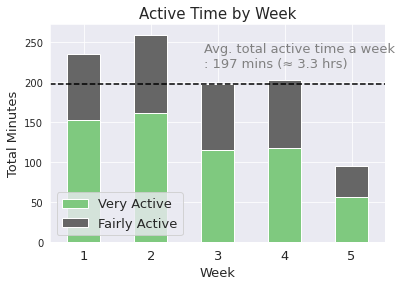

In [57]:
# find out the difference of 'ActiveMinutes' in each week
ax = wom_grouped.plot(kind = 'bar', stacked = True, cmap = 'Accent')

# set the title, ticks and labels
ax.set_title('Active Time by Week', fontsize = 15)
ax.set_xlabel('Week', fontsize = 13)
ax.set_ylabel('Total Minutes', fontsize = 13)
ax.set_xticklabels(['1', '2', '3', '4', '5'], fontsize = 13, rotation = 0)

# set the legend and place it out of the figure
labels2 = ['Very Active', 'Fairly Active']
plt.legend(labels2, fontsize = 13, loc = 'lower left')

# add a horizontal line and text showing the average active minutes
ax.axhline((wom_grouped.VeryActiveMinutes.sum() + wom_grouped.FairlyActiveMinutes.sum()) / 5, ls = '--', c = 'black')
ax.text(1.8, 218, 'Avg. total active time a week\n: 197 mins (≈ 3.3 hrs)', c = 'gray', fontsize = 13)

# export the figure
# plt.savefig('...', dpi = 400, bbox_inches = 'tight')

# show the plot
plt.show()

In [58]:
# calculate the average active mins and hours per week
min_week = round((wom_grouped.VeryActiveMinutes.sum() + wom_grouped.FairlyActiveMinutes.sum()) / 5)
hrs_week = round((wom_grouped.VeryActiveMinutes.sum() + wom_grouped.FairlyActiveMinutes.sum()) / 5 / 60, 2)

* users were very or fairly active for approx. 3.3 hours a week
* activity decreased over time
* users were **the most active in the first 2 weeks**

#### 2.2 Activity Trends: Days of the Week
Were the users more active on certain days of the week?   

In [59]:
# change the data type of 'Date' to 'datetime64'
full_merged['Date'] = full_merged['Date'].astype('datetime64')

In [60]:
# add a new column that indicates which day of the week it is
full_merged['DayOfWeek'] = full_merged['Date'].dt.day_name()

In [61]:
# create a dataframe showing the avg. total steps/day on each day of the week (for the report)
avg_steps = full_merged.groupby('DayOfWeek')['TotalSteps'].mean().astype('int64')
dow_steps = pd.DataFrame(avg_steps)

In [62]:
# reset index
dow_steps.reset_index(inplace = True)

In [63]:
# convert DayofWeek column to a categorical and specify the order
dow_steps['DayOfWeek'] = pd.Categorical(dow_steps['DayOfWeek'],
                                        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# sort the column
dow_steps = dow_steps.sort_values('DayOfWeek')

In [64]:
# create a copy of the dataframe with easier-to-read column names (for the report)
dow_steps_copy = dow_steps.rename(columns = {'DayOfWeek':'Day of the Week', 'TotalSteps':'Avg.Steps/Day'})

# check the dataframe
dow_steps_copy

,Day of the Week,Avg.Steps/Day
1,Monday,8644
5,Tuesday,9118
6,Wednesday,8367
4,Thursday,8487
0,Friday,8082
2,Saturday,9139
3,Sunday,7808


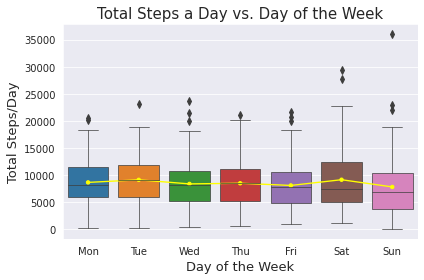

In [65]:
# set the order parameter for the day of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# generate a boxplot
ax = sns.boxplot(data = full_merged, x = 'DayOfWeek', y = 'TotalSteps', linewidth = 0.7, order = order)

# add a pointplot showing mean values
ax = sns.pointplot(data = dow_steps, x = 'DayOfWeek', y = 'TotalSteps', ci = None,
              dodge = .8 - .8 / 3, scale = 0.5, color = 'yellow', markers = 'o')

# set the title, labels, and layout
ax.set_title('Total Steps a Day vs. Day of the Week', fontsize = 15)
ax.set_ylabel('Total Steps/Day', fontsize = 13)
ax.set_xlabel('Day of the Week', fontsize = 13)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()

# export the figure
# plt.savefig('...', dpi = 400, bbox_inches = 'tight')

# show the plot
plt.show()

* activity was relatively consistent during the week
* users **walked the most on Tuesdays and Saturdays, the least on Sundays**
* _some ‘outliers’(⧫) walked over 20,000 steps some days, were they more active in general?_

#### 2.3 Activity Trends: Superusers


In [66]:
# subset the data for over 20k steps/day
over_20k_steps = full_merged[full_merged.TotalSteps > 20000]

In [67]:
# get the user Ids
users_over20k = over_20k_steps['Id'].unique()

In [68]:
# check the shape
over_20k_steps.shape

(19, 19)

In [69]:
# count the unique user Ids who walked over 20k/day
over_20k_steps['Id'].nunique()

7

* 19 instances in 7 unique users where a user walked over 20k steps a day

Let's take a close look at these users' activity.  

In [70]:
# subset the data with those users only
over_20k_df = activity_d[activity_d['Id'].isin(users_over20k)]

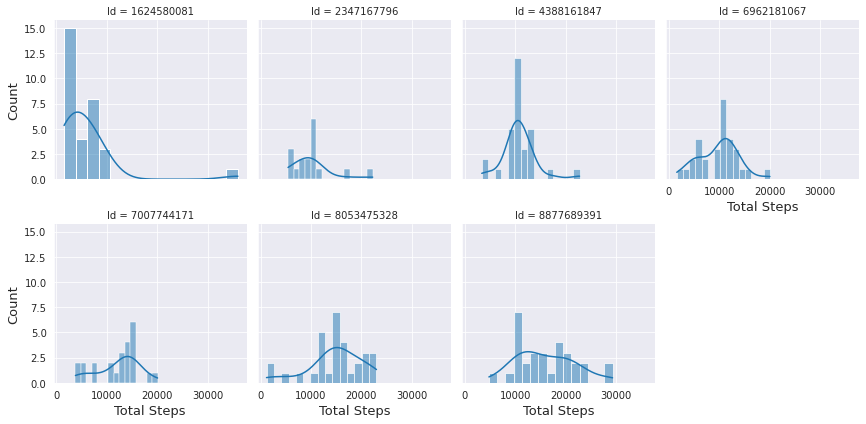

In [71]:
# plot the distribution of TotalSteps for the 7 superusers
g = sns.FacetGrid(over_20k_df, col = 'Id', col_wrap = 4)
g.map(sns.histplot, 'TotalSteps', kde = True, bins = 15)

# set the labels and layout
g.set_axis_labels('Total Steps', 'Count', fontsize = 13)
plt.tight_layout()

# show the plot
plt.show()

* one user(Id 1624580081) is an outlier who walked over 30k steps only 1 time
* the other **6 users ('superusers') walked more than non-superusers**

We will make two different charts for the outlier and the rest of the superuser group to see the trends more clearly.  

In [72]:
# subset the data without the outlier = superusers
superusers = over_20k_df[over_20k_df.Id != 1624580081]
outlier = over_20k_df[over_20k_df.Id == 1624580081]

# get a list of Ids in superuser_no_outlier
superuser_Ids = list(superusers.Id.unique())

# get the rounded mean vaule for each superuser
user1_mean = round(superusers[superusers.Id == superuser_Ids[0]].TotalSteps.mean())
user2_mean = round(superusers[superusers.Id == superuser_Ids[1]].TotalSteps.mean())
user3_mean = round(superusers[superusers.Id == superuser_Ids[2]].TotalSteps.mean())
user4_mean = round(superusers[superusers.Id == superuser_Ids[3]].TotalSteps.mean())
user5_mean = round(superusers[superusers.Id == superuser_Ids[4]].TotalSteps.mean())
user6_mean = round(superusers[superusers.Id == superuser_Ids[5]].TotalSteps.mean())

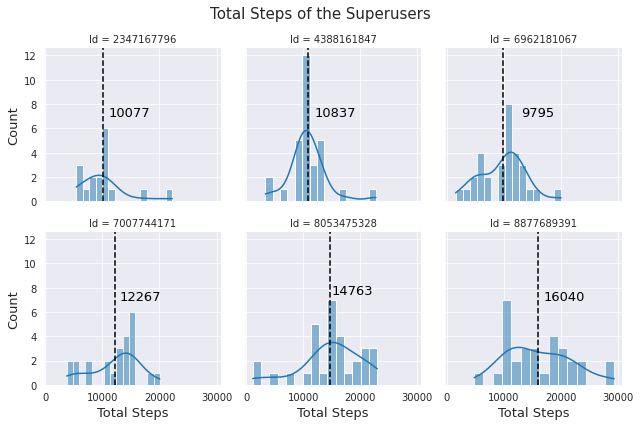

In [73]:
# plot the distribution of TotalSteps for the 6 superusers
g = sns.FacetGrid(superusers, col = 'Id', col_wrap = 3)
g.map(sns.histplot, 'TotalSteps', kde = True, bins = 15)

# set the labels and layout
g.set_axis_labels('Total Steps', 'Count', size = 13)
g.fig.suptitle('Total Steps of the Superusers', size = 15)
plt.tight_layout()

# create a dict for line positions
lines = {0:[user1_mean, 0, 12, 11000, 7, user1_mean],
         1:[user2_mean, 0, 12, 12000, 7, user2_mean],
         2:[user3_mean, 0, 12, 13000, 7, user3_mean],
         3:[user4_mean, 0, 12, 13000, 7, user4_mean],
         4:[user5_mean, 0, 12, 15000, 7.5, user5_mean],
         5:[user6_mean, 0, 12, 17000, 7, user6_mean]}

# flatten axes into a 1-d array
axes = g.axes.flatten()

# add vertical lines indicating the mean value of each user
for i, ax in enumerate(axes):
    ax.axvline(lines[i][0], ls = '--', c = 'black')
    ax.text(lines[i][3], lines[i][4], lines[i][5], c = 'black', size = 13)

# export the figure
# plt.savefig('..., dpi = 400, bbox_inches = 'tight')

# show the plot
plt.show()

Now let's add a chart showing the distribution of the total steps of the outlier.

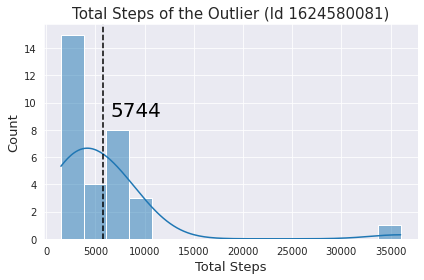

In [74]:
# plot the distribution of TotalSteps for the outlier
sns.histplot(outlier.TotalSteps, kde = True, bins = 15)

# set the labels and layout
plt.xlabel('Total Steps', size = 13)
plt.ylabel('Count', size = 13)
plt.title('Total Steps of the Outlier (Id 1624580081)', size = 15)
plt.tight_layout()

# add the vertical line and text for the mean value (text size is big for the report)
plt.axvline(round(outlier.TotalSteps.mean()), ls = '--', c = 'black')
plt.text(6500, 9, round(outlier.TotalSteps.mean()), c = 'black', size = 20)

# export the figure
# plt.savefig('...', dpi = 400, bbox_inches = 'tight')

# show the plot
plt.show()

Let's add a table to the report that shows the average steps a day for superusers and non-superusers.

In [75]:
# create a dataframe showing average total steps for each group of users 
mean_df = pd.DataFrame({'Non-superusers (n = 27)': round(activity_d[~activity_d.Id.isin(superuser_Ids)].TotalSteps.mean()),
                        'Superusers (n = 6)': round(superusers.TotalSteps.mean())}, 
                       index = ['Avg. Total Steps'])
# swap rows and columns
mean_df = mean_df.transpose()

In [76]:
# check the dataframe
mean_df

,Avg. Total Steps
Non-superusers (n = 27),7561
Superusers (n = 6),12496


* **the 6 users (“superusers”) took about 1.7 times more steps on average**, compared to non-superusers
* _what other types of users are there?_

#### 2.4 Clustering of Usage Patterns
Let's generate a clustermap to see what types of users are there and what their characteristics are.

In [77]:
# extract days from timestamps as we will be analyzing daily data
full_merged['Date'] = [d.date() for d in full_merged['Date']]

In [78]:
# create a wide dataframe for a clustermap of TotalSteps
# replace NaN values with 0 for the map
TotalSteps_w = full_merged.pivot_table(index = 'Date', columns = 'Id', values = 'TotalSteps').fillna(0)

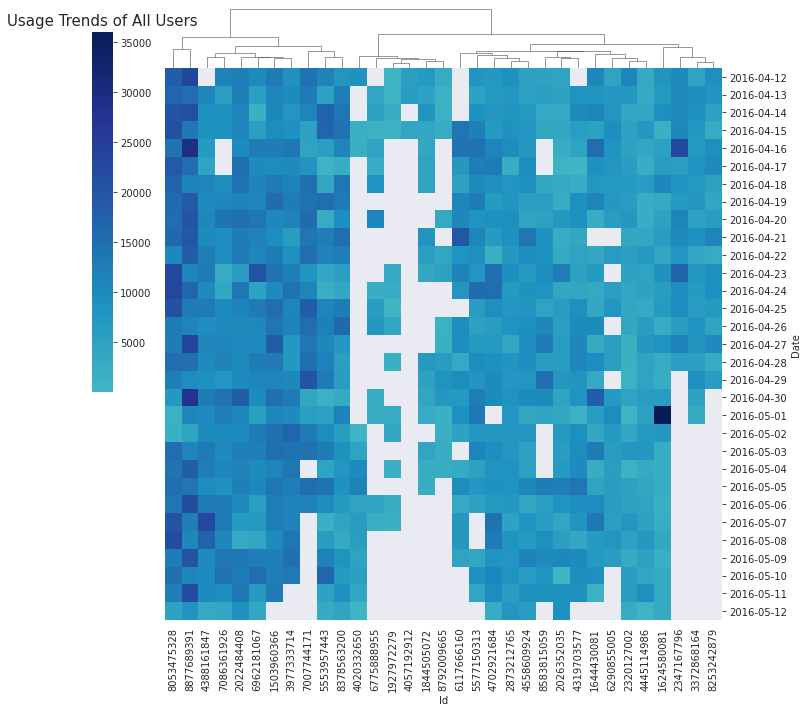

In [79]:
# plot a clustermap of TotalSteps
sns.clustermap(TotalSteps_w, xticklabels = True, yticklabels = True, center = 0, 
               cmap = 'YlGnBu', row_cluster = False, mask=(TotalSteps_w == 0), 
               method = 'ward', dendrogram_ratio = (.1, .1), cbar_pos = (0, .45, .03, .5))

# add a title
plt.title('Usage Trends of All Users', size=15)

# export the figure
# plt.savefig('...', dpi = 400, bbox_inches = 'tight')

# show the plot
plt.show()

There are 2 main groups:
* **Group 1)** More active
   - Consistent higher activity 
* **Group 2)** Less active
 - a) Only used in the first few days and intermittently after
 - b) Lower activity levels throughout
 - c) Only used during the first half
 -> **Superusers are mostly in the more active group**

#### 2.5 Compare Group 1 vs. 2b - Daily Activity
Two of these groups consistently recorded their activity over the assessment period.  Let's compare the daily activity of Group 1 (n = 11, consistent higher activity) to Group 2b (n = 12, lower activity throughout).

In [80]:
# create lists of Ids for each group
group1_ids = [8053475328, 8877689391, 4388161847, 7086361926, 2022484408, 
              6962181067, 1503960366, 3977333714, 7007744171, 5553957443, 8378563200]
group2b_ids = [6117666160, 5577150313, 4702921684, 2873212765, 4558609924, 8583815059, 
               2026352035, 4319703577, 1644430081, 6290855005, 2320127002, 4445114986]

In [81]:
# split datetime into two separate date and time columns
steps_h['Date'] = pd.to_datetime(steps_h['ActivityHour']).dt.date
steps_h['Time'] = pd.to_datetime(steps_h['ActivityHour']).dt.time

In [82]:
# remove the datetime column from the dataframe
steps_h.drop('ActivityHour', inplace = True, axis = 1)

In [83]:
# check the dataframe
steps_h

,Id,StepTotal,Date,Time
0,1503960366,373,2016-04-12,00:00:00
1,1503960366,160,2016-04-12,01:00:00
2,1503960366,151,2016-04-12,02:00:00
3,1503960366,0,2016-04-12,03:00:00
4,1503960366,0,2016-04-12,04:00:00
...,...,...,...,...
22094,8877689391,514,2016-05-12,10:00:00
22095,8877689391,1407,2016-05-12,11:00:00
22096,8877689391,3135,2016-05-12,12:00:00
22097,8877689391,307,2016-05-12,13:00:00


In [84]:
# create a grouped by Id and Time dataframe 
grouped_df = steps_h.groupby(['Id', 'Time']).StepTotal.mean().reset_index()

In [85]:
# check the new grouped dataframe
grouped_df

,Id,Time,StepTotal
0,1503960366,00:00:00,142.666667
1,1503960366,01:00:00,50.100000
2,1503960366,02:00:00,29.000000
3,1503960366,03:00:00,11.833333
4,1503960366,04:00:00,3.600000
...,...,...,...
787,8877689391,19:00:00,755.000000
788,8877689391,20:00:00,480.166667
789,8877689391,21:00:00,500.733333
790,8877689391,22:00:00,291.200000


In [86]:
# define the dataframes for each group
group1 = grouped_df[grouped_df.Id.isin(group1_ids)]
group2b = grouped_df[grouped_df.Id.isin(group2b_ids)]

In [87]:
# get the hourly mean value of total steps for each group
group1_grouped = group1.groupby('Time').StepTotal.mean().astype('int64').to_frame().reset_index()
group2b_grouped = group2b.groupby('Time').StepTotal.mean().astype('int64').to_frame().reset_index()

In [88]:
# create a dataframe with the data of both groups
two_groups = pd.merge(group1_grouped, group2b_grouped, how = 'outer', on = 'Time', suffixes = ['_1', '_2b'])

In [89]:
# change the format of the column 'Time'
two_groups['Time'] = [h.strftime('%H') for h in two_groups['Time']]

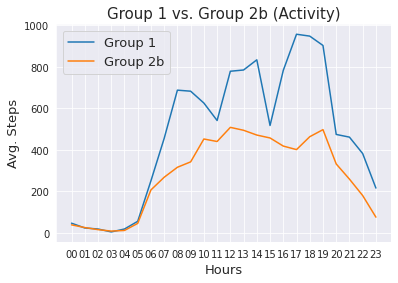

In [90]:
# plot the distribution of hourly steps for Group 1 and Group 2b
sns.lineplot(x = 'Time', y = 'value', hue = 'variable', data = pd.melt(two_groups, ['Time']))

# set the labels, title, and layout
plt.xlabel('Hours', size = 13)
plt.ylabel('Avg. Steps', size = 13)
plt.title('Group 1 vs. Group 2b (Activity)', size = 15)

# set the legend
plt.legend(labels = ['Group 1', 'Group 2b'], fontsize = 13)

# export the figure
# plt.savefig('...', dpi = 400, bbox_inches = 'tight')

# show the plot
plt.show()

**Group 1**
* morning, afternoon, evening **peaks**
* **activity levels rise quickly in the morning**
* highest peak in the evening

**Group 2b**
* relatively **constant lower levels of activity**

_Are daily trajectories suggestive of different lifestyle patterns?_

#### 2.6 Compare Group 1 vs. 2b - Sleep
Did the two groups differ in their sleep patterns?

In [91]:
# turn off the warnings
pd.options.mode.chained_assignment = None

In [92]:
# subset the full_merged dataframe
two_groups_all = full_merged[full_merged.Id.isin(group1_ids) | full_merged.Id.isin(group2b_ids)]

In [93]:
# add a new column 'Group'
two_groups_all['Group'] = ['1' if Id in group1_ids else '2b' for Id in two_groups_all.Id]

In [94]:
# subset the data again this time for the sleep data only
two_groups_sleep = two_groups_all[['Date', 'Id', 'TotalMinutesAsleep', 'Group']]

In [95]:
# check the subset
two_groups_sleep

,Date,Id,TotalMinutesAsleep,Group
0,2016-04-12,1503960366,327.0,1
2,2016-04-12,1644430081,NaN,2b
5,2016-04-12,2022484408,NaN,1
6,2016-04-12,2026352035,503.0,2b
7,2016-04-12,2320127002,NaN,2b
...,...,...,...,...
1016,2016-05-12,7086361926,444.0,1
1017,2016-05-12,8053475328,NaN,1
1019,2016-05-12,8378563200,496.0,1
1020,2016-05-12,8583815059,NaN,2b


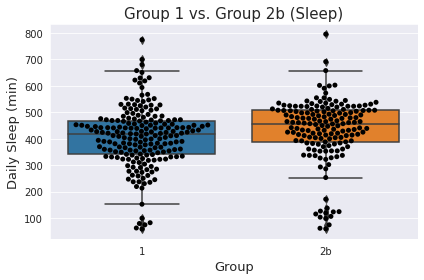

In [96]:
# plot the distribution of TotalMinutesAsleep for Group 1 and 2b
ax = sns.boxplot(x = 'Group', y = 'TotalMinutesAsleep', data = two_groups_sleep)
ax = sns.swarmplot(x = 'Group', y = 'TotalMinutesAsleep', data = two_groups_sleep, color = 'black')

# set the labels and layout
plt.title('Group 1 vs. Group 2b (Sleep)', size = 15)
plt.xlabel('Group', size = 13)
plt.ylabel('Daily Sleep (min)', size = 13)
plt.tight_layout()

# export the figure
# plt.savefig('...', dpi = 400, bbox_inches = 'tight')

# show the plot
plt.show()

In [97]:
# check the numbers for the report
two_groups_sleep[two_groups_sleep.Group == '1'].describe()

,TotalMinutesAsleep
count,198.000000
mean,406.015152
std,114.659305
min,58.000000
25%,341.250000
50%,418.000000
75%,468.750000
max,775.000000


In [98]:
# check the numbers for the report
two_groups_sleep[two_groups_sleep.Group == '2b'].describe()

,TotalMinutesAsleep
count,163.000000
mean,431.582822
std,122.439545
min,59.000000
25%,388.000000
50%,457.000000
75%,507.500000
max,796.000000


**Group 1: avg. 406 mins (6.8 hrs) a day**
* more users tracked their sleep
* most users slept for 5.7 - 7.8 hours a day

**Group 2b: avg. 432 mins (7.2 hrs) a day**
* fewer users tracked their sleep
* most users slept for 6.5 - 8.5 hours a day

**Group 2b slept slightly longer than Group 1, but no big difference in sleep patterns was observed.**

***

## <a id="share_act">5. Share & Act</a>

This project is shared on Kaggle, and the report can be viewed [here](https://drive.google.com/file/d/1WeTVSKGG43HtthDAlAqe2dAUcHlilx8T/view?usp=sharing). 
  

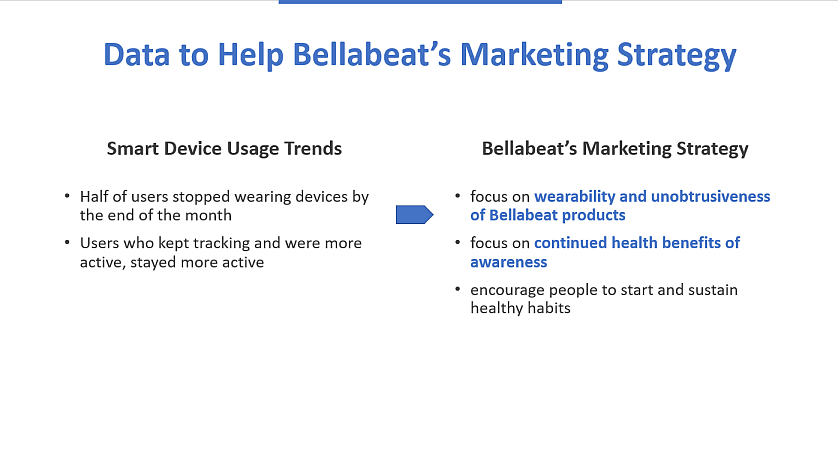

***

## <a id="appendix">Appendix</a>

You can find the details of the dataset below:

|File No.||Content||File Name||Unit||Note||Selected|
|:-:||:-||:-||:-||:-||:-|
|1||Activity||**<font color = '#4472C4'>dailyActivity_merged</font>**||Day||-||**<font color = '#4472C4'>Yes</font>**|
|2||Calories||dailyCalories_merged||Day||Included in File 1||No|
|3||Calories||hourlyCalories_merged||Hour||-||No|
|4||Calories||minuteCaloriesNarrow_merged||Minute||-||No|
|5||Calories||minuteCaloriesWide_merged||Minute||The wide form of File 4||No|
|6||Intensities||dailyIntensities_merged||Day||Included in File 1||No|
|7||Intensities||hourlyIntensities_merged||Hour||-||No|
|8||Intensities||minuteIntensitiesNarrow_merged||Minute||-||No|
|9||Intensities||minuteIntensitiesWide_merged||Minute||The wide form of File 8||No|
|10||Steps||dailySteps_merged||Day||Included in File 1||No|
|11||Steps||**<font color = '#4472C4'>hourlySteps_merged</font>**||Hour||-||**<font color = '#4472C4'>Yes</font>**|
|12||Steps||minuteStepsNarrow_merged||Minute||-||No|
|13||Steps||minuteStepsWide_merged||Minute||The wide form of File 12||No|
|14||Sleep||**<font color = '#4472C4'>sleepDay_merged</font>**||Day||-||**<font color = '#4472C4'>Yes</font>**|
|15||Sleep||minuteSleep_merged</font>||Minute||-||No|
|16||Heartrate||heartrate_seconds_merged||Second||-||No|
|17||METs||minuteMETsNarrow_merged||Minute||-||No|
|18||Weight||weightLogInfo_merged||Day||-||No|